# **Collecting Data**
This dataset for orange resistance is from kaggle :
1. https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

For this model, we take only the good quality orange dataset. 

Before start, ensure to download dataset. We already zip it to drive in link below 
https://drive.google.com/file/d/1eDk3JkUpz5mqfvCkE1ZuZ8UFa-w8IfLG/view?usp=sharing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import shutil
import os

source = r'/content/gdrive/MyDrive/orange_new.zip'
destination = r'/content/orange.zip'
shutil.copyfile(source, destination)

'/content/orange.zip'

In [4]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

# **Explore data & preprocessing**

In [40]:
path = r'/content/orange/'
categories= os.listdir(path)
categories

['3', '12', '1', '7']

12, 7, 1, 3 means that the fruit is still good for 12 more days, 7 more days, 1 more days or 3 more days

In [6]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} more days directory : {} file ".format(categorie, count_num_file(path,categorie)))

3 more days directory : 288 file 
12 more days directory : 741 file 
1 more days directory : 72 file 
7 more days directory : 469 file 


**Image Augmentation**


---


1 more days directory have small number of file (72) compare to the large one is 7 more days that have 469 file. So we add more augmentation on that directory. 

In [7]:
import os
from PIL import Image 
path_rotate = r'/content/orange/1/'
file_name = os.listdir(path_rotate)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(40).save(path_rotate+'rotate_40'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(50).save(path_rotate+'rotate_50'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(65).save(path_rotate+'rotate_65'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(85).save(path_rotate+'rotate_85'+i)
            
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(100).save(path_rotate+'rotate_100'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(125).save(path_rotate+'rotate_125'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(145).save(path_rotate+'rotate_145'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(200).save(path_rotate+'rotate_200'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(225).save(path_rotate+'rotate_225'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(240).save(path_rotate+'rotate_240'+i)

In [8]:
for categorie in categories :
  print("{} folder : {} file ".format(categorie, count_num_file(path,categorie)))

3 folder : 288 file 
12 folder : 741 file 
1 folder : 152 file 
7 folder : 469 file 


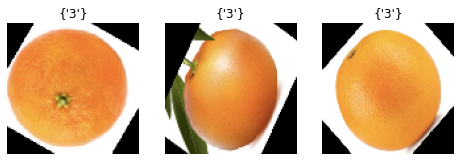

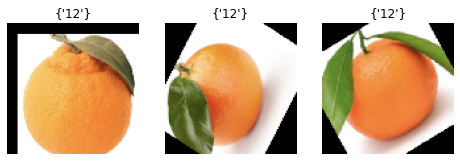

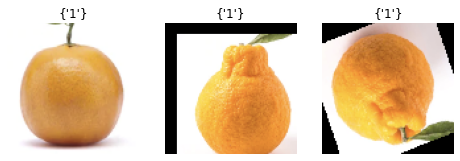

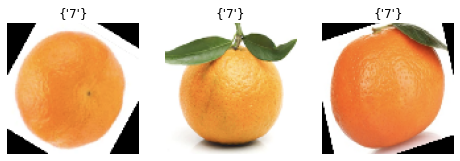

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  
 
  select_img= np.random.choice(img, 3, replace = False)

  
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
    
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,                 
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [11]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1322 images belonging to 4 classes.
Found 328 images belonging to 4 classes.


# Build model (Inception V3)

In [12]:

from tensorflow.keras.applications.inception_v3 import InceptionV3

# InceptionV3 model  
base = InceptionV3(input_shape=(100,100,3), include_top = False)


87916544/87910968 [==============================] - 3s 0us/step


Freeze all layer 

In [29]:
for layer in base.layers:
    layer.trainable = False

In [30]:

import tensorflow as tf
model = tf.keras.models.Sequential([
    
    base,

    #Using global average pooling because inception output have 4 dimension shape 
    #So, we change it to two dimension shape
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
batch_normalization_96 (Batc (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 22,855,972
Trainable params: 1,052,164
Non-trainable params: 21,803,808
_________________________________________________________________


In [31]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [32]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)

In [33]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\n The accuracy of the training set and the validation set has reached > 99!")
      
callbacks = myCallback()

In [34]:
history=model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=100,
      validation_data=val_generator, 
      validation_steps=5, 
      callbacks=[modelcheck,earlystop,callbacks],
      verbose=1)

Epoch 1/100
20/20 [==============================] - 22s 891ms/step - loss: 1.7214 - accuracy: 0.4110 - val_loss: 1.8363 - val_accuracy: 0.4250

Epoch 00001: val_accuracy did not improve from 0.74375
Epoch 2/100
20/20 [==============================] - 17s 828ms/step - loss: 1.1481 - accuracy: 0.5734 - val_loss: 1.2964 - val_accuracy: 0.5188

Epoch 00002: val_accuracy did not improve from 0.74375
Epoch 3/100
20/20 [==============================] - 16s 806ms/step - loss: 1.1104 - accuracy: 0.5547 - val_loss: 1.1829 - val_accuracy: 0.5688

Epoch 00003: val_accuracy did not improve from 0.74375
Epoch 4/100
20/20 [==============================] - 16s 779ms/step - loss: 0.9722 - accuracy: 0.5971 - val_loss: 1.0997 - val_accuracy: 0.5312

Epoch 00004: val_accuracy did not improve from 0.74375
Epoch 5/100
20/20 [==============================] - 16s 821ms/step - loss: 0.8909 - accuracy: 0.6281 - val_loss: 1.4957 - val_accuracy: 0.4938

Epoch 00005: val_accuracy did not improve from 0.74375


**It stops at epoch 69, because of early stopping**

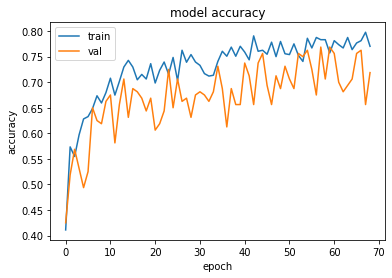

In [35]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

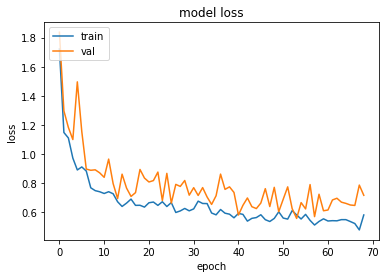

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

11/11 [==============================] - 7s 569ms/step - loss: 0.5944 - accuracy: 0.7530
Accuracy train:  0.7745839357376099
Accuracy test:  0.7530487775802612
